# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Optimizing Self-Driving

Notebook 1 - Data Collection, Cleaning & EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [2]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

### Data Source

Initially, we generated our own data by driving the car simulator. However our concern was the quality of the data generated by our own driving as the best practice of driving takes time and are subject to individual perspectives. We then found the datasets shared by the simulator developer which include several laps of data with good driving habits. To be more strategic with using our time, we decided to go with those data instead. The datasets come in four separate folders, each of which contains screenshots captured by three cameras (left, center and right) on the simulated car every 0.1s, and a driving log which recorded the screenshots and corresponding driving data, namely, 'steering', 'throttle', 'reverse' and 'speed'.

The four datasets were collected in different stages of the track:
- Dataset-1: 14 minutes driving data on track 1 of the simulator. The track is a normal highway with some turns.
- Dataset-2: Dataset for all the curves and turns in the track.
- Dataset-3: Dataset for all the curves and turns in the track by driving the car in the opposite direction.
- Dataset-4: Dataset for the straight roads in the track.

In [3]:
log_1= pd.read_csv('../data/dataset-1/driving_log.csv')
log_1.head()

,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0,0.1,0.2,22.14829
0,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
1,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
2,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
3,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
4,IMG/center_2016_12_01_13_31_13_279.jpg,IMG/left_2016_12_01_13_31_13_279.jpg,IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993


In [4]:
log_2 = pd.read_csv('../data/dataset-2/driving_log.csv')
log_2.head()

,/Users/siddiqui/turn-1/IMG/center_2017_08_25_18_35_19_017.jpg,/Users/siddiqui/turn-1/IMG/left_2017_08_25_18_35_19_017.jpg,/Users/siddiqui/turn-1/IMG/right_2017_08_25_18_35_19_017.jpg,-0.008181014,0.4,0,30.03803
0,/Users/siddiqui/turn-1/IMG/center_2017_08_25_18_35_19_087.jpg,/Users/siddiqui/turn-1/IMG/left_2017_08_25_18_35_19_087.jpg,/Users/siddiqui/turn-1/IMG/right_2017_08_25_18_35_19_087.jpg,-0.008181,0.4,0,30.03803
1,/Users/siddiqui/turn-1/IMG/center_2017_08_25_18_35_19_156.jpg,/Users/siddiqui/turn-1/IMG/left_2017_08_25_18_35_19_156.jpg,/Users/siddiqui/turn-1/IMG/right_2017_08_25_18_35_19_156.jpg,-0.008181,0.4,0,30.03803
2,/Users/siddiqui/turn-1/IMG/center_2017_08_25_18_35_19_223.jpg,/Users/siddiqui/turn-1/IMG/left_2017_08_25_18_35_19_223.jpg,/Users/siddiqui/turn-1/IMG/right_2017_08_25_18_35_19_223.jpg,-0.008181,0.4,0,30.03803
3,/Users/siddiqui/turn-1/IMG/center_2017_08_25_18_35_19_291.jpg,/Users/siddiqui/turn-1/IMG/left_2017_08_25_18_35_19_291.jpg,/Users/siddiqui/turn-1/IMG/right_2017_08_25_18_35_19_291.jpg,-0.008181,0.4,0,30.03803
4,/Users/siddiqui/turn-1/IMG/center_2017_08_25_18_35_19_365.jpg,/Users/siddiqui/turn-1/IMG/left_2017_08_25_18_35_19_365.jpg,/Users/siddiqui/turn-1/IMG/right_2017_08_25_18_35_19_365.jpg,-0.008181,0.4,0,30.03803


In [5]:
log_3 = pd.read_csv('../data/dataset-3/driving_log.csv')
log_3.head()

,/Users/siddiqui/turns-2/IMG/center_2017_08_25_18_40_48_926.jpg,/Users/siddiqui/turns-2/IMG/left_2017_08_25_18_40_48_926.jpg,/Users/siddiqui/turns-2/IMG/right_2017_08_25_18_40_48_926.jpg,-0.05892541,0.4,0,30.03849
0,/Users/siddiqui/turns-2/IMG/center_2017_08_25_18_40_48_996.jpg,/Users/siddiqui/turns-2/IMG/left_2017_08_25_18_40_48_996.jpg,/Users/siddiqui/turns-2/IMG/right_2017_08_25_18_40_48_996.jpg,-0.048902,0.4,0,30.03849
1,/Users/siddiqui/turns-2/IMG/center_2017_08_25_18_40_49_067.jpg,/Users/siddiqui/turns-2/IMG/left_2017_08_25_18_40_49_067.jpg,/Users/siddiqui/turns-2/IMG/right_2017_08_25_18_40_49_067.jpg,-0.047280,0.4,0,30.03846
2,/Users/siddiqui/turns-2/IMG/center_2017_08_25_18_40_49_138.jpg,/Users/siddiqui/turns-2/IMG/left_2017_08_25_18_40_49_138.jpg,/Users/siddiqui/turns-2/IMG/right_2017_08_25_18_40_49_138.jpg,-0.044848,0.4,0,30.03843
3,/Users/siddiqui/turns-2/IMG/center_2017_08_25_18_40_49_211.jpg,/Users/siddiqui/turns-2/IMG/left_2017_08_25_18_40_49_211.jpg,/Users/siddiqui/turns-2/IMG/right_2017_08_25_18_40_49_211.jpg,-0.044848,0.4,0,30.03840
4,/Users/siddiqui/turns-2/IMG/center_2017_08_25_18_40_49_279.jpg,/Users/siddiqui/turns-2/IMG/left_2017_08_25_18_40_49_279.jpg,/Users/siddiqui/turns-2/IMG/right_2017_08_25_18_40_49_279.jpg,-0.038620,0.4,0,30.03840


In [6]:
log_4 = pd.read_csv('../data/dataset-4/driving_log.csv')
log_4.head()

,/Users/siddiqui/turns-3/IMG/center_2017_08_25_18_32_45_059.jpg,/Users/siddiqui/turns-3/IMG/left_2017_08_25_18_32_45_059.jpg,/Users/siddiqui/turns-3/IMG/right_2017_08_25_18_32_45_059.jpg,-0.02284788,0.4,0,30.03837
0,/Users/siddiqui/turns-3/IMG/center_2017_08_25_18_32_45_128.jpg,/Users/siddiqui/turns-3/IMG/left_2017_08_25_18_32_45_128.jpg,/Users/siddiqui/turns-3/IMG/right_2017_08_25_18_32_45_128.jpg,-0.051076,0.4,0,30.03799
1,/Users/siddiqui/turns-3/IMG/center_2017_08_25_18_32_45_196.jpg,/Users/siddiqui/turns-3/IMG/left_2017_08_25_18_32_45_196.jpg,/Users/siddiqui/turns-3/IMG/right_2017_08_25_18_32_45_196.jpg,-0.067770,0.4,0,30.03772
2,/Users/siddiqui/turns-3/IMG/center_2017_08_25_18_32_45_264.jpg,/Users/siddiqui/turns-3/IMG/left_2017_08_25_18_32_45_264.jpg,/Users/siddiqui/turns-3/IMG/right_2017_08_25_18_32_45_264.jpg,-0.084279,0.4,0,30.03755
3,/Users/siddiqui/turns-3/IMG/center_2017_08_25_18_32_45_335.jpg,/Users/siddiqui/turns-3/IMG/left_2017_08_25_18_32_45_335.jpg,/Users/siddiqui/turns-3/IMG/right_2017_08_25_18_32_45_335.jpg,-0.084279,0.4,0,30.03777
4,/Users/siddiqui/turns-3/IMG/center_2017_08_25_18_32_45_407.jpg,/Users/siddiqui/turns-3/IMG/left_2017_08_25_18_32_45_407.jpg,/Users/siddiqui/turns-3/IMG/right_2017_08_25_18_32_45_407.jpg,-0.039763,0.4,0,30.03849


### Data Cleaning

The datasets are fairly neat and does not neat much cleaning thanks to the fact that they were all recorded automatically by the simulator. There are only two areas that required cleaning: 
1. add column names for each log; 

In [7]:
log_1.columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
log_2.columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
log_3.columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
log_4.columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']

2. align the path of the screenshots in the log with the actual path.

In [8]:
# log_1's path is different from the other three, and center format is different from left and right 

log_1['center'] = log_1['center'].str.replace('IMG', 'dataset-1/IMG')
log_1['left'] = log_1['left'].str.replace(' IMG', 'dataset-1/IMG')
log_1['right'] = log_1['right'].str.replace(' IMG', 'dataset-1/IMG')

In [9]:
columns = ['center', 'left', 'right']

# log_2's path is slightly different from log 3 and 4
for column in columns:
    log_2[column] = log_2[column].str.replace('/Users/siddiqui/turn-1/IMG', 'dataset-2/IMG')

logs = [log_3, log_4]
i = 2

for log in logs:
    i += 1
    for column in columns:
        log[column] = log[column].str.replace('/Users/siddiqui/turns-'+str(i-1)+'/IMG', 'dataset-'+str(i)+'/IMG')

With data cleaned, we concated all the driving logs into one dataframe and saved to the folder.

In [10]:
df = pd.concat([log_1, log_2])
df = pd.concat([df, log_3])
df = pd.concat([df, log_4])

In [11]:
df.dtypes

center      object 
left        object 
right       object 
steering    float64
throttle    float64
reverse     float64
speed       float64
dtype: object

In [12]:
df.reset_index(inplace = True, drop = True)
df.to_csv('../data/merged_driving_log.csv', index=False)

### EDA & Visualizations

#### Steering Angle

First we would like to examine our target, the steering angle.

In [13]:
df.steering.describe()

count    9268.000000
mean     0.000040   
std      0.125833   
min     -0.942695   
25%     -0.016915   
50%      0.000000   
75%      0.000000   
max      1.000000   
Name: steering, dtype: float64

The mean of steering angles is 0, with standard deviation of 0.16. We could tell that the data does not have big spread, which makes sense as too much steering should not be expected on a gentle track.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


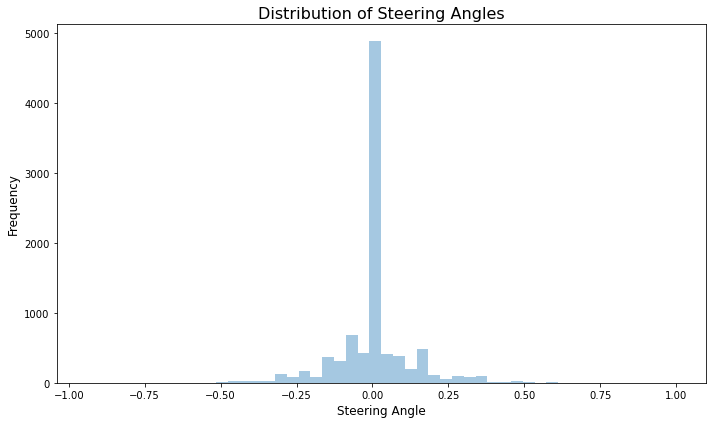

In [14]:
plt.figure(figsize = (10,6))
sns.distplot(df.steering, kde=False)
plt.title('Distribution of Steering Angles', fontsize = 16)
plt.xlabel('Steering Angle', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.tight_layout()
plt.savefig('../charts/dist_of_steering_angles');

The above histogram shows that 0 degree is the abosolute most frequent number, which echos our finding before. Next we would like to take a look at the steering angles on roads with turns. So we removed 0 in the next plotting.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


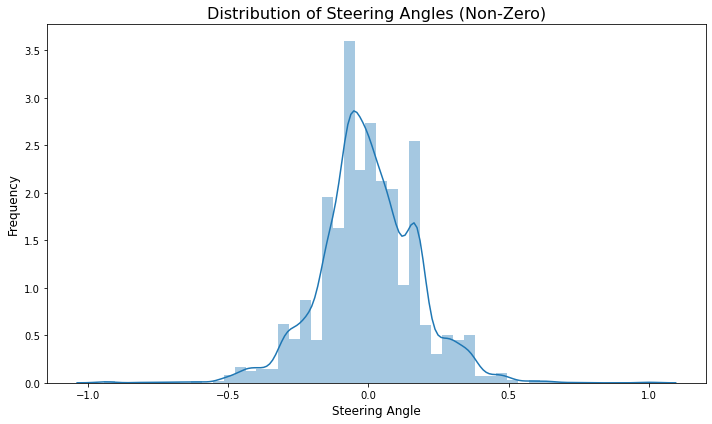

In [15]:
plt.figure(figsize = (10,6))
sns.distplot(df[df.steering!=0].steering)
plt.title('Distribution of Steering Angles (Non-Zero)', fontsize = 16)
plt.xlabel('Steering Angle', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.tight_layout()
plt.savefig('../charts/dist_of_steering_angles_n0');

The distribution is not entirly normally distributed, therefore we might need to consider normalize the data when conducting models.

#### Speed

In [16]:
df.speed.describe()

count    9268.000000
mean     28.378210  
std      5.775266   
min      0.502490   
25%      30.067632  
50%      30.186110  
75%      30.186630  
max      30.709360  
Name: speed, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


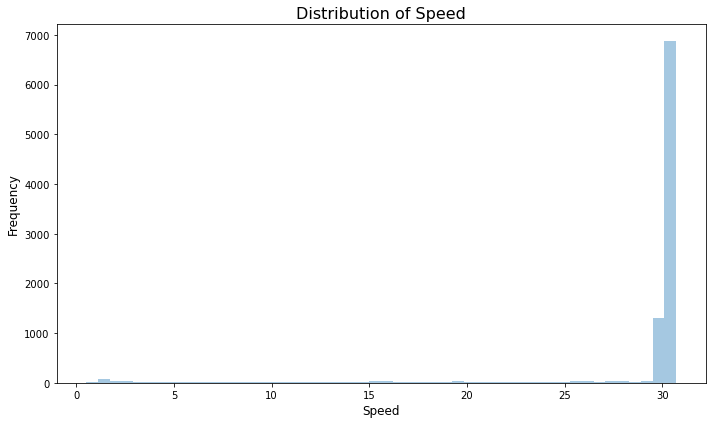

In [17]:
plt.figure(figsize = (10,6))
sns.distplot(df.speed, kde=False)
plt.title('Distribution of Speed', fontsize = 16)
plt.xlabel('Speed', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.tight_layout()
plt.savefig('../charts/dist_of_speed');

The distribution of speed is highly skewed to the left. Majority of the time the car drives at the maximum speed around 30 mph.

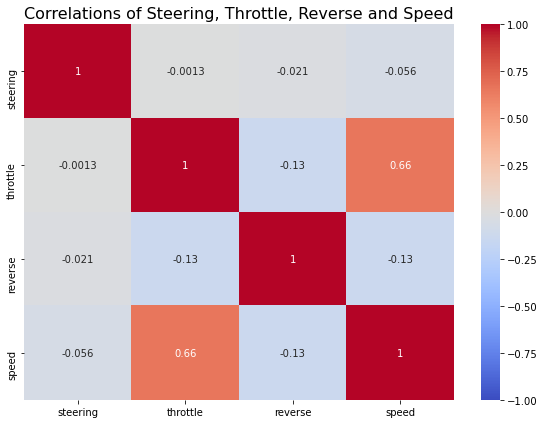

In [18]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(),
           annot=True,
           cmap = 'coolwarm',
           vmin = -1,
           vmax = 1)
plt.title('Correlations of Steering, Throttle, Reverse and Speed', fontsize = 16)

plt.tight_layout()
plt.savefig('../charts/heatmap');

The above heatmap shows a negative correlation between speed and steering, but the magnitude is not too strong, which may indicate that the road condition is overall smooth and doesn't have too many sudden turns. The throttle and speed are strongly correlated, which complies with the common sense. The reverse and the steering are slightly negatively correlated. However as the reverse sample is very small in the datasets, as shown below 33 out of 9268, therefore not much should be inferred from the correlation.

In [19]:
df[df.reverse != 0].count()

center      33
left        33
right       33
steering    33
throttle    33
reverse     33
speed       33
dtype: int64

In [20]:
df.shape

(9268, 7)

#### Image Data

We then moved on to exploring the image data by showing random screenshot samples with negative, zero and positive steering angles from three cameras.

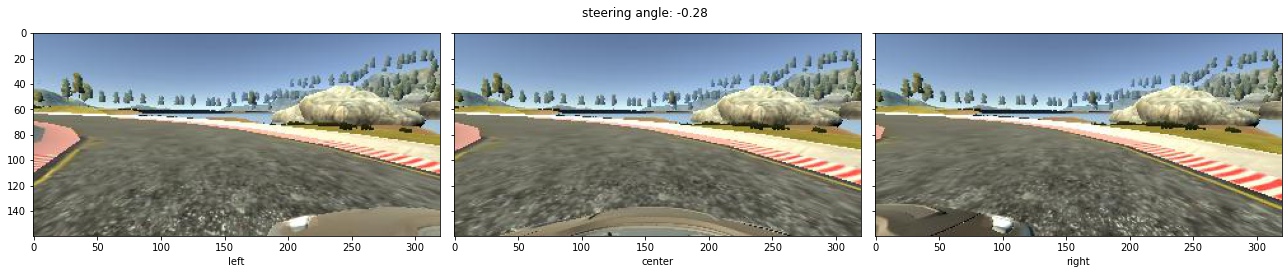

In [92]:
sample = int(np.random.choice(9267, 1))
if df.steering[sample] < 0:

    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (18, 4))

# formatting float credti to https://stackoverflow.com/questions/46062105/rounding-floats-with-f-string
plt.suptitle(f'steering angle: {df.steering[sample]:.2f}', y = 0.9)

left = mpimg.imread('../data/'+df.left[sample], 0)
ax1.imshow(left)
ax1.set_xlabel('left')

center = mpimg.imread('../data/'+ df.center[sample], 0)
ax2.imshow(center)
ax2.set_xlabel('center')

right = mpimg.imread('../data/'+df.right[sample], 0)
ax3.imshow(right)
ax3.set_xlabel('right')

plt.tight_layout()
plt.savefig('../charts/neg_steer.png')

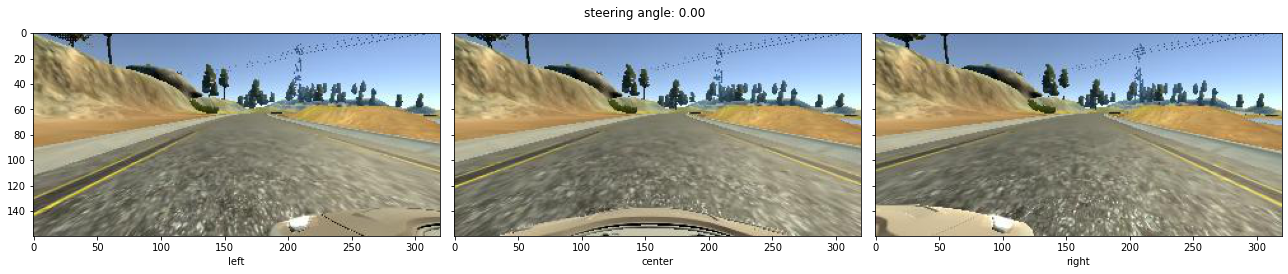

In [87]:
sample = int(np.random.choice(9267, 1))
if df.steering[sample] == 0:

    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (18, 4))

# formatting float credti to https://stackoverflow.com/questions/46062105/rounding-floats-with-f-string
plt.suptitle(f'steering angle: {df.steering[sample]:.2f}', y = 0.9)

left = mpimg.imread('../data/'+df.left[sample], 0)
ax1.imshow(left)
ax1.set_xlabel('left')

center = mpimg.imread('../data/'+ df.center[sample], 0)
ax2.imshow(center)
ax2.set_xlabel('center')

right = mpimg.imread('../data/'+df.right[sample], 0)
ax3.imshow(right)
ax3.set_xlabel('right')

plt.tight_layout()
plt.savefig('../charts/zero_steer.png')

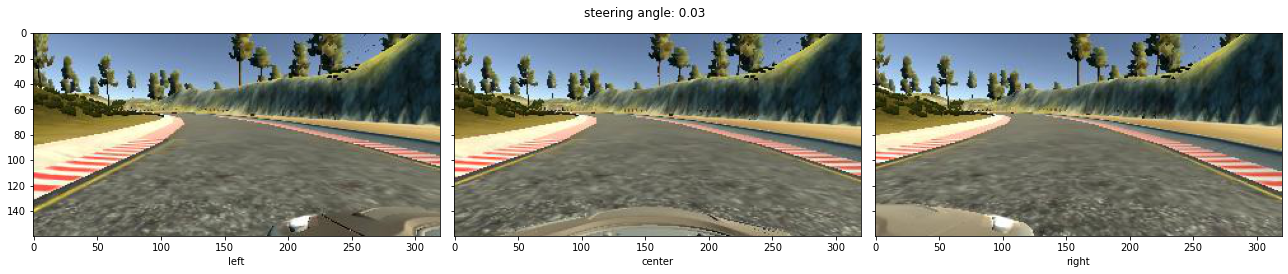

In [86]:
sample = int(np.random.choice(9267, 1))
if df.steering[sample] > 0:

    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (18, 4))

# formatting float credti to https://stackoverflow.com/questions/46062105/rounding-floats-with-f-string
plt.suptitle(f'steering angle: {df.steering[sample]:.2f}', y = 0.9)

left = mpimg.imread('../data/'+df.left[sample], 0)
ax1.imshow(left)
ax1.set_xlabel('left')

center = mpimg.imread('../data/'+ df.center[sample], 0)
ax2.imshow(center)
ax2.set_xlabel('center')

right = mpimg.imread('../data/'+df.right[sample], 0)
ax3.imshow(right)
ax3.set_xlabel('right')

plt.tight_layout()
plt.savefig('../charts/pos_steer.png')

As shown above, the center camera alone is able to capture all the information. The left and right cameras in this way, do not provide additional information. However they can be used to adjust the steering when the driving goes off-centered. In addition, each picture has irrelevant information such as sky and the tip of the car, which takes up the space of the screenshot. We should consider crop the photos to improve the efficiency of the image data.